04-Visualizations

In [371]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
#I'll eventually need the index of y_test
%store -r

In [373]:
#read in data
models = pd.read_csv('.././data/misclass_and_model.csv')
original = pd.read_csv('.././data/reddit_data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (27,67,70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [374]:
#in my models dataframe, I really just need the name and the misclassified rows
misclassified = models[['model_name','misclassified_rows']]
pd.DataFrame(misclassified)
#I want to extract the array held in the misclassified rows column, so I'll make a new dataframe 
#with rows slightly longer than the largest array of misclassified data
df = pd.DataFrame(index = range(0,580))
#for every array in the misclassified data column, convert to a series and split by the comma, 
#these series become a column in the new DF dataframe, then name the columns by the model_name they originally held
for row in misclassified.index:
    df[row]= pd.Series(misclassified['misclassified_rows'][row].split(','))

df.columns = models['model_name']

In [375]:
df

model_name,model_1,model_3,model_7,model_9,model_5,model_2,model_4,model_6,model_8,model_10
0,(array([ 2,(array([ 12,(array([ 36,(array([ 58,(array([ 5,(array([ 2,(array([ 2,(array([ 5,(array([ 2,(array([ 0
1,12,52,52,66,10,12,10,10,58,2
2,18,58,58,67,12,13,12,12,66,12
3,52,66,64,94,17,18,44,17,67,36
4,66,67,67,104,18,52,52,18,76,52
...,...,...,...,...,...,...,...,...,...,...
575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3290,NaN,NaN
576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3291,NaN,NaN
577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3298]),NaN,NaN
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,),NaN,NaN


In [376]:
#The series carried over some string characters, so I'm replacing them with nothing
for column in df.columns:
    df[column] = df[column].str.replace(r'\D', '')

In [387]:
#the last row for each series was a parentheses, i'm replacing that with null
for column in df.columns:
    df[column].loc[df[column] == '',] = np.nan

In [390]:
df['model_1'][304]

nan

In [393]:
#now that I've removed all of the string values, I can convert everything to numeric values
for column in df:
    df[column] = pd.to_numeric(df[column])

In [394]:
df.dtypes

model_name
model_1     float64
model_3     float64
model_7     float64
model_9     float64
model_5     float64
model_2     float64
model_4     float64
model_6     float64
model_8     float64
model_10    float64
dtype: object

In [395]:
#model_6 had the worst score, so it has the largest number of misclassified values
df.isnull().sum()

model_name
model_1     277
model_3     301
model_7     255
model_9     277
model_5      36
model_2     255
model_4     287
model_6       2
model_8     289
model_10    322
dtype: int64

In [397]:
#The numbers in the dataframe are the reset index of y_test, so I need to grab the actual value at those positions 
#from the y_test dataframe imported using -r
#at position 2 of the restructured y_test index, the value was 5513, which was the original data's index value for the data
positions = y_test.index
dictionary ={p:v for p,v in enumerate(positions)}



In [406]:
#Now I'm taking the columns in my dataframe and converting them to a very long list
values = []
for column in df.columns:
    for item in df[column].to_list():
        values.append(item)

#this takes the dictionary I previously created from the y_test index, which has 1 line for each index value
#and uses the long list I just created to loop through every y_test index value, and return the count from how many times it appears in the list
#now I have a new dictionary of pairs of original index values and how many times it was misclassified
counts = {value: values.count(key) for key, value in dictionary.items()}
    

In [407]:
#here is the dataframe wit y_test's original index values and the count of 
counts = pd.DataFrame.from_dict(counts, orient = 'index')
counts.columns = ['misclassified_frequency']
counts

,misclassified_frequency
2922,1
1407,0
5513,5
5352,0
7639,0
...,...
913,0
6059,0
8618,0
8783,5


In [489]:
#merging the titles with all of the rows in the y_test dataframe
titles = counts.merge(original, left_index =True, right_index = True)
titles.shape

(3300, 82)

In [490]:
y_test.shape

(3300,)

In [499]:
#plants more often misclassified
titles.loc[titles['misclassified_frequency'] >0,:]['subreddit'].value_counts(normalize = True)

plants    0.610116
cats      0.389884
Name: subreddit, dtype: float64

In [500]:
titles.loc[titles['misclassified_frequency'] ==10,:]['subreddit'].value_counts(normalize = True)

plants    0.862745
cats      0.137255
Name: subreddit, dtype: float64

In [433]:
count_values = pd.DataFrame(counts.value_counts().sort_values(), columns = ['posts_misclassified'])


In [441]:
#I created a dataframe to house the frequency of posts misclassified and rest the index so that I can sort by the misclassified frequency more easily
count_values.reset_index(inplace = True)
#sorting and resetting the index
count_values.sort_values(by=['misclassified_frequency'], ignore_index = True, inplace = True)

In [443]:
count_values

,index,misclassified_frequency,posts_misclassified
0,0,0,2351
1,1,1,200
2,2,2,333
3,3,3,68
4,4,4,53
5,5,5,46
6,6,6,49
7,7,7,40
8,8,8,78
9,9,9,31


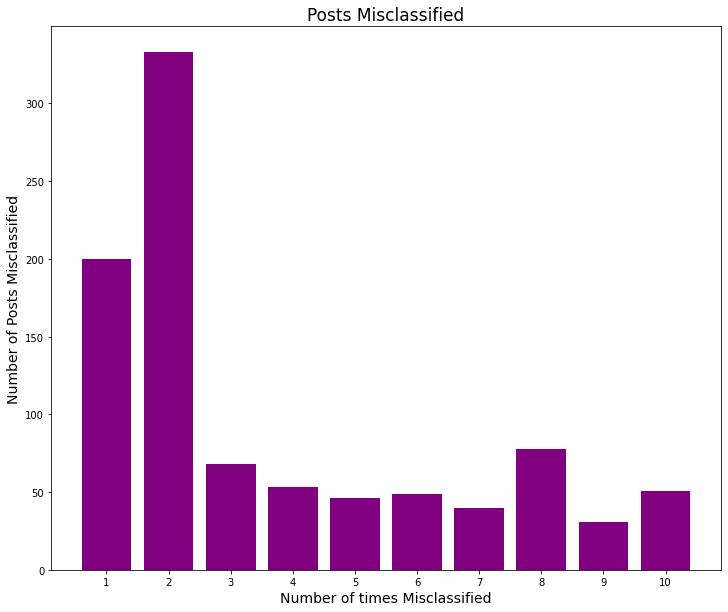

In [501]:
#using the 
plt.figure(figsize = (12,10))
plt.xlabel('Number of times Misclassified', size = 14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Number of Posts Misclassified', size = 14)
plt.bar(x = count_values['misclassified_frequency'][1:11], height = count_values['posts_misclassified'][1:11], color = "Purple")

plt.title('Posts Misclassified',size = 17)
plt.savefig('.././images/misclassified.png')

In [478]:
#I'm interested in the posts misclassified most often so I'll make a new dataframe that grabs JUST the posts misclassified every time
#I'll merge these with the original data
fully_misclassified = counts.loc[counts['misclassified_frequency']==10]
fully_misclassified = fully_misclassified.merge(original, left_index =True, right_index = True)

In [485]:
#checking out the titles that were always misclassified to pull out the funny ones!
pd.set_option('display.max_colwidth', 0)

fully_misclassified[['title','subreddit','permalink','misclassified_frequency']]

,title,subreddit,permalink,misclassified_frequency
4788,Prett much me on school,plants,/r/plants/comments/k19ih1/prett_much_me_on_school/,10
2166,Is peperomia verticillata safe for cats?,plants,/r/plants/comments/jju488/is_peperomia_verticillata_safe_for_cats/,10
1981,when she says no wires,plants,/r/plants/comments/jioew4/when_she_says_no_wires/,10
1794,My once a year bounty is almost ready!,plants,/r/plants/comments/jhhk5d/my_once_a_year_bounty_is_almost_ready/,10
2088,test post,plants,/r/plants/comments/jj8chn/test_post/,10
2055,"Selfie with the queen😆I named her Beyoncé because, she’s so majestic. #Birdofparadise",plants,/r/plants/comments/jjegj2/selfie_with_the_queeni_named_her_beyoncé_because/,10
3766,This Christmas tree,plants,/r/plants/comments/jv3xys/this_christmas_tree/,10
4366,This little Scindapsus Dark Form saying hello and have a great day ahead. ☺️,plants,/r/plants/comments/jysaab/this_little_scindapsus_dark_form_saying_hello_and/,10
9426,Moms wondering “why the hell are all my plants dying”,cats,/r/cats/comments/k38bbz/moms_wondering_why_the_hell_are_all_my_plants/,10
3773,"I Had To Rescue Him! A BEAUTIFUL DIFFENBACHIA AKA ""Dumbcane"" This is PHANTOM 👻",plants,/r/plants/comments/jv1no7/i_had_to_rescue_him_a_beautiful_diffenbachia_aka/,10
